In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression

In [2]:
data1 = pd.read_csv("ex2data1.txt", header=None, names=["exam1", "exam2", "admitted"])
print(data1.info())
print(data1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     100 non-null    float64
 1   exam2     100 non-null    float64
 2   admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


### Visualization data1

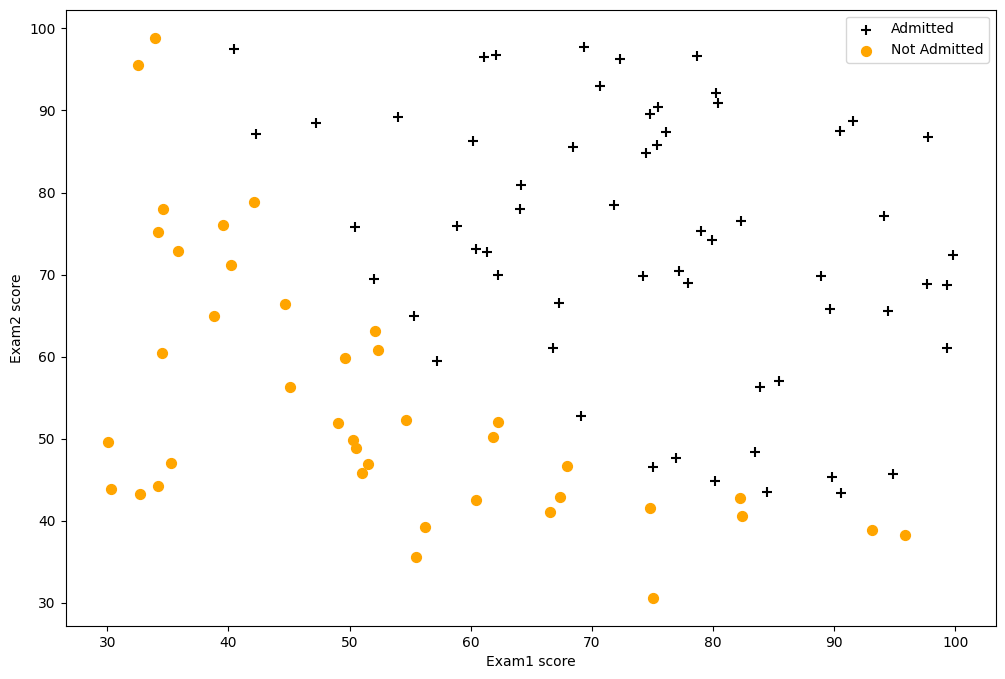

In [3]:
positive = data1.loc[data1.admitted.isin([1])]
negative = data1.loc[~data1.admitted.isin([1])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive.exam1, positive.exam2, s=50, marker="+", color="black", label="Admitted")
ax.scatter(negative.exam1, negative.exam2, s=50, marker="o", color="orange", label="Not Admitted")
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.legend()
plt.show()
plt.close()

In [4]:
X = np.array(data1.loc[:, ["exam1", "exam2"]])
X = np.insert(X, obj=0, values=0, axis=1)
y = np.array(data1.admitted).reshape((len(data1), 1))
theta = np.zeros([3, 1])
print(f"X.shape: {X.shape}\ny.shape:{y.shape}\ntheta.shape:{theta.shape}")

X.shape: (100, 3)
y.shape:(100, 1)
theta.shape:(3, 1)


### Sigmoid Function
$$g(z) = \frac{1}{1 + e^{-z}} $$

In [5]:
def sigmoid(z):
    """"""
    return 1 / (1 + np.exp(-z))

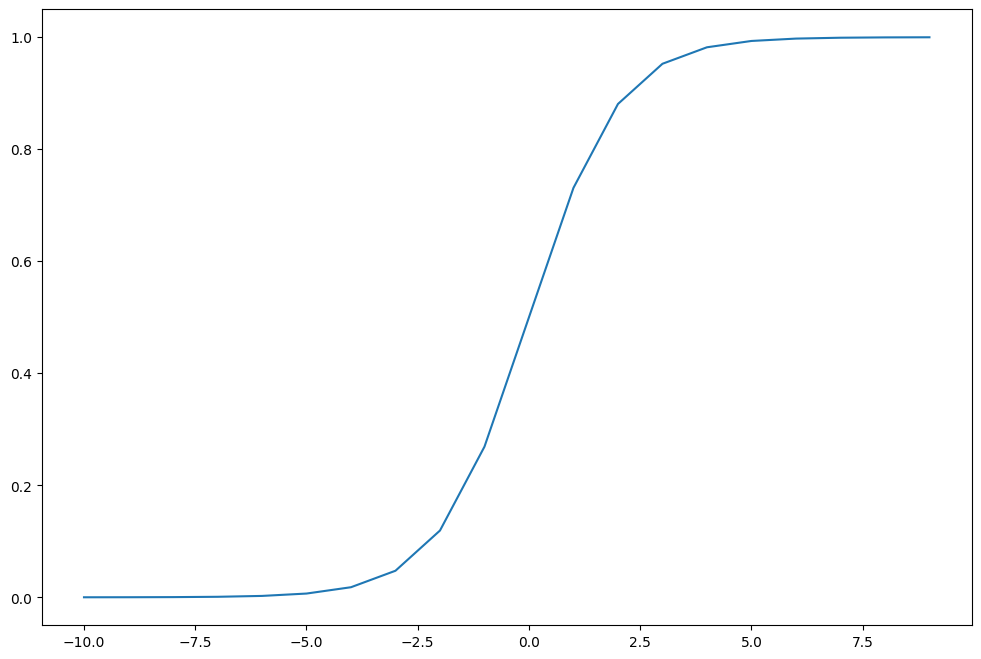

In [6]:
num = np.arange(-10, 10, 1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(num, sigmoid(num))
plt.show()
plt.close()

### Loss Function
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))]$$
$$h_{\theta}(x) = g(\theta^{T}x), g(z) = \frac{1}{1 + e^{-z}}$$

In [7]:
def lossFunction(theta, X, y):
    """Compute loss"""
    z = X @ theta
    inner = y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z))
    loss = - (np.sum(inner)) / X.shape[0]
    return loss

In [8]:
lossFunction(theta=theta, X=X, y=y)

0.6931471805599453

### Gradient Descent
$$\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$
$$h_{\theta}(x) = g(\theta^{T}x), g(z) = \frac{1}{1 + e^{-z}}$$

In [9]:
def BatchGradientDescent(theta, X, y, alpha, epoch: int):
    """Do batch gradient descent"""
    loss = np.zeros(epoch)
    temp = np.zeros(theta.shape)
    for i in range(epoch):
        z = X @ theta
        error = sigmoid(z) - y
        temp = (alpha / len(X)) * (X.T @ error)
        theta = theta - temp
        loss[i] = lossFunction(theta=theta, X=X, y=y)
    return loss, theta

In [10]:
loss, thetas = BatchGradientDescent(theta=theta, X=X, y=y, alpha=0.001, epoch=1000)
print(
    f"theta: {thetas}\nloss: {lossFunction(theta=thetas, X=X, y=y)}"
    )

theta: [[0.        ]
 [0.01042527]
 [0.00045203]]
loss: 0.6298158516905145


### Define predict function
$$h_{\theta}(x) = g(\theta^{T}x), g(z) = \frac{1}{1 + e^{-z}}$$

In [11]:
def predict(theta, X):
    """"""
    pred = sigmoid(X @ theta)
    return np.array([1 if x >= 0.5 else 0 for x in pred]).reshape(len(X), 1)

In [12]:
pred = predict(thetas, X)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(pred, y)]
# accuracy = (sum(map(int, correct)) / len(correct))
# print(f"accuracy = {accuracy * 100}%")
accuracy = (sum(map(int, correct)) % len(correct))
print(f"accuracy = {accuracy}%")

accuracy = 60%


### Plot loss linechart

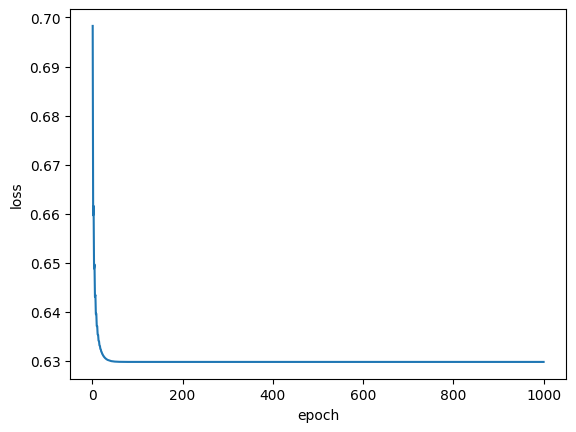

In [13]:
plt.plot(np.linspace(1, 1000, 1000), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.close()

## Regularized Logistic Regression 

### visualized data2

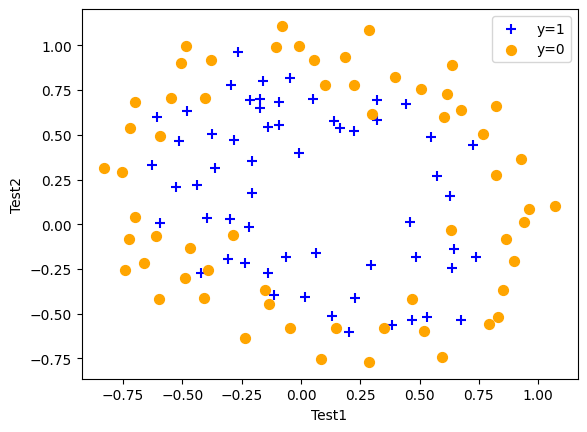

In [14]:
data2 = pd.read_csv("ex2data2.txt", header=None, names=["test1", "test2", "qa"])
positive2 = data2.loc[data2.qa==1]
negative2 = data2.loc[data2.qa==0]
plt.scatter(x=positive2.test1, y=positive2.test2, s=50, marker="+", color="blue", label="y=1")
plt.scatter(x=negative2.test1, y=negative2.test2, s=50, marker="o", color="orange", label="y=0")
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend()
plt.show()
plt.close()

In [15]:
X = np.array(data2.loc[:, ["test1", "test2"]])
X = np.insert(X, obj=0, values=0, axis=1)
y = np.array(data2.qa).reshape(len(data2), 1)
theta = np.zeros([3, 1])

### Regularized Loss Function
$$Loss = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(h_{\theta}(x^{(i)}))+(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
$$h_{\theta}(x) = g(\theta^{T}x), g(z) = \frac{1}{1 + e^{-z}}$$

In [16]:
def regularized_loss_function(theta, X, y, lamb):
    """
    :param lamb: lambda
    """
    z = X @ theta
    inner = y * np.log(sigmoid(z)) + (1 - y) * np.log(sigmoid(1 - z))
    loss = - np.sum(inner) / X.shape[0] + (np.sum(pow(theta, 2)) * lamb) / (2 * X.shape[0])
    return loss


### Regularized Gradient Descent
$$\theta_{0} = \theta_{0} - \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{0}^{i}$$
$$\theta_{j} = \theta_{j} - \frac{1}{m}[\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{i} + \lambda\theta_{j}]$$
$$h_{\theta}(x)=g(\theta^{T}x), g(z) = \frac{1}{1+e^{-z}}$$

In [17]:
def regularized_gradient_descent(theta, X, y, alpha, lamb, epoch: int):
    """
    Do regularized batch gradient descent
    """
    loss = np.zeros(epoch)
    for i in range(epoch):
        z = X @ theta
        error = sigmoid(z) - y
        theta[0] = theta[0] - (alpha / X.shape[0]) * (X[:, 0].T @ error)
        theta[1: ] = theta[1: ] - (alpha / X.shape[0]) * (X[:, 1:].T @ error + lamb * theta[1: ])
        loss[i] = regularized_loss_function(theta=theta, X=X, y=y, lamb=lamb)
    return loss, theta

In [18]:
loss, thetas = regularized_gradient_descent(theta=theta, X=X, y=y, alpha=0.001, lamb=0.5, epoch=1000)
print(
    f"theta: {thetas}\nloss: {lossFunction(theta=thetas, X=X, y=y)}"
)

theta: [[ 0.        ]
 [-0.01818127]
 [-0.0001317 ]]
loss: 0.692815794087854


In [19]:
pred = predict(thetas, X)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(pred, y)]
# accuracy = (sum(map(int, correct)) / len(correct))
# print(f"accuracy = {accuracy * 100}%")
accuracy = (sum(map(int, correct)) % len(correct))
print(f"accuracy = {accuracy}%")

accuracy = 65%
